In [1]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from src.model import GPT

dataset = "openwebtext"
model = "gpt2"
dataset_suffix = "_gpt2.bin"
block_size = 512


root_dir = "out/decompositions/"
data_dir = os.path.join(root_dir, f"{dataset}-{model}")
suffix = "id1-512_none_train.npy"
global_mean = np.load(os.path.join(data_dir, f"global_mean_{suffix}"))
pos = np.load(os.path.join(data_dir, f"pos_{suffix}"))
cbasis = np.load(os.path.join(data_dir, f"cbasis_{suffix}"))
token = np.load(os.path.join(data_dir, f"token_{suffix}"))

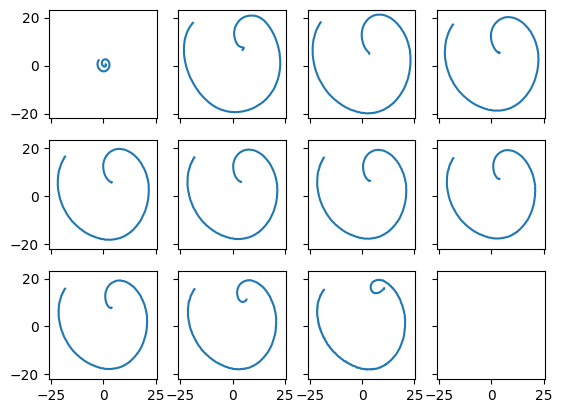

In [21]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True)
for i in range(11):
    p = pos[i]
    u, s, vt = np.linalg.svd(p)
    # pc2 = u[:, :2] @ np.diag(s[:2]) @ vt[:2]
    pc2 = p @ vt[:2, :].T
    ax[i // 4][i % 4].plot(pc2[:, 0], pc2[:, 1])

1. Positional basis在layer之间：第0层，最后一层和中间层之间scale差别非常大
2. 